In [ ]:
#project

In [ ]:
!pip install scikit-learn==1.2.2


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import RocCurveDisplay, confusion_matrix, roc_auc_score, classification_report, average_precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
date_columns = ["Timestamp"]
df = pd.read_csv("/content/drive/MyDrive/ddos_dataset 4.csv", parse_dates=date_columns,index_col=None)
df.head()

<ipython-input-2-9312e054a8c2>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("/content/drive/MyDrive/ddos_dataset 4.csv", parse_dates=date_columns,index_col=None)


,Flow ID,Timestamp,Fwd Pkt Len Mean,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
0,172.31.69.28-18.216.200.189-80-52169-6,2018-02-22 00:27:57,233.750000,233.750000,-1,32768,0,ddos
1,172.31.69.25-18.219.193.20-80-44588-6,2018-02-16 23:18:14,0.000000,0.000000,-1,225,0,ddos
2,172.31.69.25-18.219.193.20-80-43832-6,2018-02-16 23:23:20,114.333333,114.333333,-1,219,0,ddos
3,172.31.69.25-18.219.193.20-80-53346-6,2018-02-16 23:22:41,233.750000,233.750000,-1,211,0,ddos
4,172.31.69.28-18.218.55.126-80-57856-6,2018-02-21 23:49:25,233.750000,233.750000,-1,32768,0,ddos


In [ ]:
df.info()
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Flow ID            500000 non-null  object        
 1   Timestamp          500000 non-null  datetime64[ns]
 2   Fwd Pkt Len Mean   500000 non-null  float64       
 3   Fwd Seg Size Avg   500000 non-null  float64       
 4   Init Fwd Win Byts  500000 non-null  int64         
 5   Init Bwd Win Byts  500000 non-null  int64         
 6   Fwd Seg Size Min   500000 non-null  int64         
 7   Label              500000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 30.5+ MB


,Flow ID,Timestamp,Fwd Pkt Len Mean,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
499995,False,False,False,False,False,False,False,False
499996,False,False,False,False,False,False,False,False
499997,False,False,False,False,False,False,False,False
499998,False,False,False,False,False,False,False,False


In [ ]:
#feature Extraction
df[['Source', 'Destination', 'Source Port', 'Dest Port', 'Other']] = df['Flow ID'].str.split('-', expand=True)
df.head(20)

,Flow ID,Timestamp,Fwd Pkt Len Mean,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label,Source,Destination,Source Port,Dest Port,Other
0,172.31.69.28-18.216.200.189-80-52169-6,2018-02-22 00:27:57,233.750000,233.750000,-1,32768,0,ddos,172.31.69.28,18.216.200.189,80,52169,6
1,172.31.69.25-18.219.193.20-80-44588-6,2018-02-16 23:18:14,0.000000,0.000000,-1,225,0,ddos,172.31.69.25,18.219.193.20,80,44588,6
2,172.31.69.25-18.219.193.20-80-43832-6,2018-02-16 23:23:20,114.333333,114.333333,-1,219,0,ddos,172.31.69.25,18.219.193.20,80,43832,6
3,172.31.69.25-18.219.193.20-80-53346-6,2018-02-16 23:22:41,233.750000,233.750000,-1,211,0,ddos,172.31.69.25,18.219.193.20,80,53346,6
4,172.31.69.28-18.218.55.126-80-57856-6,2018-02-21 23:49:25,233.750000,233.750000,-1,32768,0,ddos,172.31.69.28,18.218.55.126,80,57856,6


In [ ]:
#feature selection
df = df.drop(columns=["Timestamp" , "Other"])
df.head()

,Flow ID,Fwd Pkt Len Mean,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label,Source,Destination,Source Port,Dest Port
0,172.31.69.28-18.216.200.189-80-52169-6,233.750000,233.750000,-1,32768,0,ddos,172.31.69.28,18.216.200.189,80,52169
1,172.31.69.25-18.219.193.20-80-44588-6,0.000000,0.000000,-1,225,0,ddos,172.31.69.25,18.219.193.20,80,44588
2,172.31.69.25-18.219.193.20-80-43832-6,114.333333,114.333333,-1,219,0,ddos,172.31.69.25,18.219.193.20,80,43832
3,172.31.69.25-18.219.193.20-80-53346-6,233.750000,233.750000,-1,211,0,ddos,172.31.69.25,18.219.193.20,80,53346
4,172.31.69.28-18.218.55.126-80-57856-6,233.750000,233.750000,-1,32768,0,ddos,172.31.69.28,18.218.55.126,80,57856


In [ ]:
#Feature Extraction
df[['SourceIP_1', 'SourceIP_2', 'SourceIP_3', 'SourceIP_4']] = df.Source.str.split('.', expand=True)
df[['DestinationIP_1', 'DestinationIP_2', 'DestinationIP_3', 'DestinationIP_4']] = df.Destination.str.split('.', expand=True)
df = df.drop(columns=["Source", "Destination", "Flow ID"])
df.head()

,Fwd Pkt Len Mean,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label,Source Port,Dest Port,SourceIP_1,SourceIP_2,SourceIP_3,SourceIP_4,DestinationIP_1,DestinationIP_2,DestinationIP_3,DestinationIP_4
0,233.750000,233.750000,-1,32768,0,ddos,80,52169,172,31,69,28,18,216,200,189
1,0.000000,0.000000,-1,225,0,ddos,80,44588,172,31,69,25,18,219,193,20
2,114.333333,114.333333,-1,219,0,ddos,80,43832,172,31,69,25,18,219,193,20
3,233.750000,233.750000,-1,211,0,ddos,80,53346,172,31,69,25,18,219,193,20
4,233.750000,233.750000,-1,32768,0,ddos,80,57856,172,31,69,28,18,218,55,126


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.isna().sum()

Fwd Pkt Len Mean     0
Fwd Seg Size Avg     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Seg Size Min     0
Label                0
Source Port          0
Dest Port            0
SourceIP_1           0
SourceIP_2           0
SourceIP_3           0
SourceIP_4           0
DestinationIP_1      0
DestinationIP_2      0
DestinationIP_3      0
DestinationIP_4      0
dtype: int64

In [ ]:
#Label Encoding
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])
df.head()

,Fwd Pkt Len Mean,Fwd Seg Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Label,Source Port,Dest Port,SourceIP_1,SourceIP_2,SourceIP_3,SourceIP_4,DestinationIP_1,DestinationIP_2,DestinationIP_3,DestinationIP_4
0,233.750000,233.750000,-1,32768,0,1,80,52169,172,31,69,28,18,216,200,189
1,0.000000,0.000000,-1,225,0,1,80,44588,172,31,69,25,18,219,193,20
2,114.333333,114.333333,-1,219,0,1,80,43832,172,31,69,25,18,219,193,20
3,233.750000,233.750000,-1,211,0,1,80,53346,172,31,69,25,18,219,193,20
4,233.750000,233.750000,-1,32768,0,1,80,57856,172,31,69,28,18,218,55,126


In [1]:
#Random Sampling
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('Label' , axis = 1)
y = df['Label']
RUS = RandomUnderSampler(random_state=42)
X_rus, y_rus = RUS.fit_resample(X,y)

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Fwd Pkt Len Mean   500000 non-null  float64
 1   Fwd Seg Size Avg   500000 non-null  float64
 2   Init Fwd Win Byts  500000 non-null  int64  
 3   Init Bwd Win Byts  500000 non-null  int64  
 4   Fwd Seg Size Min   500000 non-null  int64  
 5   Label              500000 non-null  int64  
 6   Source Port        500000 non-null  object 
 7   Dest Port          500000 non-null  object 
 8   SourceIP_1         500000 non-null  object 
 9   SourceIP_2         500000 non-null  object 
 10  SourceIP_3         500000 non-null  object 
 11  SourceIP_4         500000 non-null  object 
 12  DestinationIP_1    500000 non-null  object 
 13  DestinationIP_2    500000 non-null  object 
 14  DestinationIP_3    500000 non-null  object 
 15  DestinationIP_4    500000 non-null  object 
dtypes:

<ipython-input-12-9d1b30b4e621>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_rus, palette='Set2')


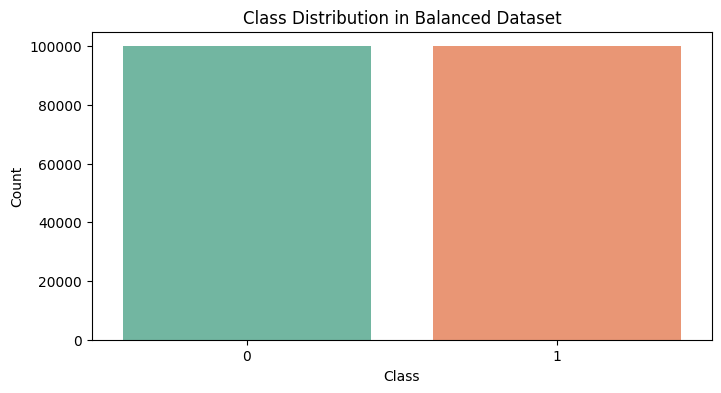

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.countplot(x=y_rus, palette='Set2')
plt.title('Class Distribution in Balanced Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
#Data Spliting
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42)


--- Logistic Regression ---
Accuracy: 0.9884
ROC AUC Score: 0.9973
Precision-Recall AUC Score: 0.9957
Confusion Matrix:
[[29438   413]
 [  282 29867]]


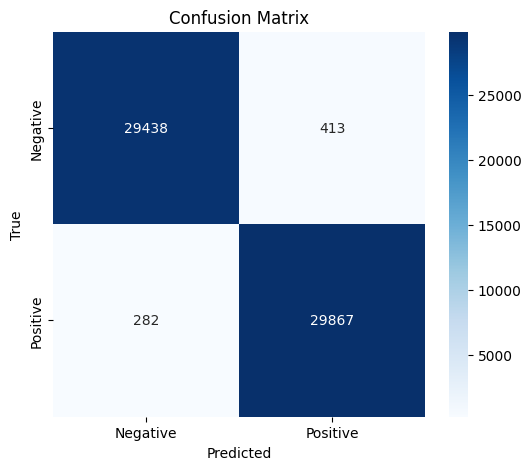

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     29851
           1       0.99      0.99      0.99     30149

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



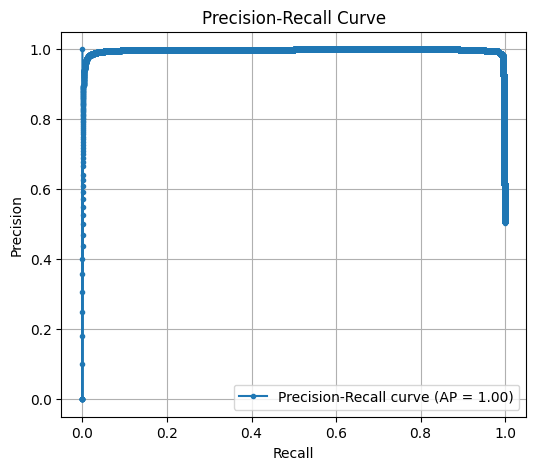


--- KNN ---
Accuracy: 0.9996
ROC AUC Score: 0.9998
Precision-Recall AUC Score: 0.9996
Confusion Matrix:
[[29828    23]
 [    3 30146]]


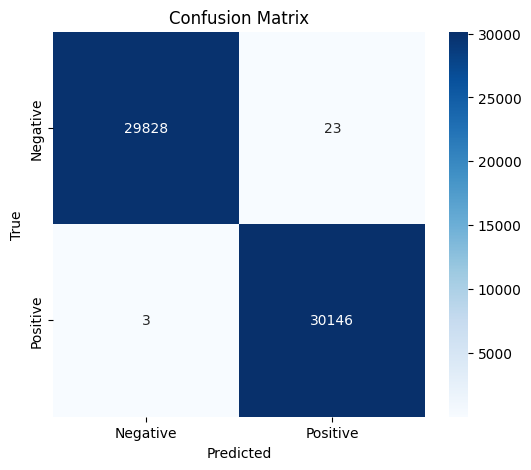

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29851
           1       1.00      1.00      1.00     30149

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



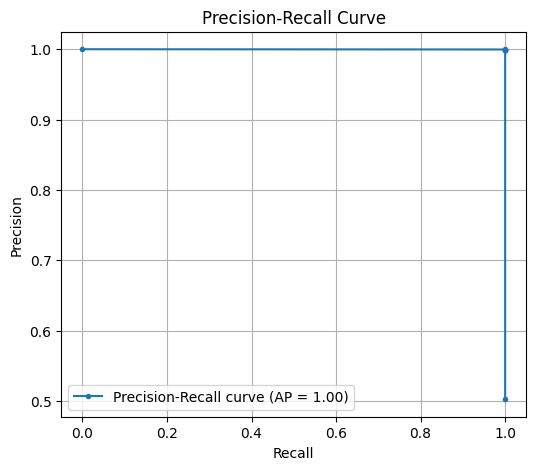


--- Naive Bayes ---
Accuracy: 0.9889
ROC AUC Score: 0.9937
Precision-Recall AUC Score: 0.9959
Confusion Matrix:
[[29699   152]
 [  517 29632]]


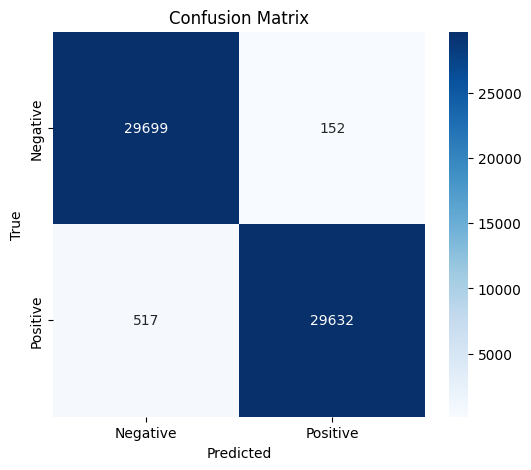

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     29851
           1       0.99      0.98      0.99     30149

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



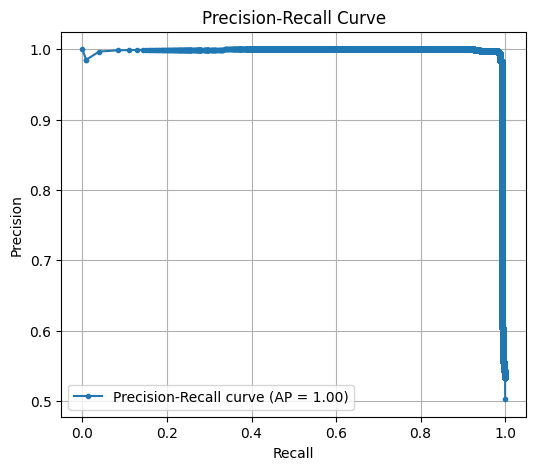


--- Decision Tree ---
Accuracy: 1.0000
ROC AUC Score: 0.9999
Precision-Recall AUC Score: 0.9999
Confusion Matrix:
[[29848     3]
 [    0 30149]]


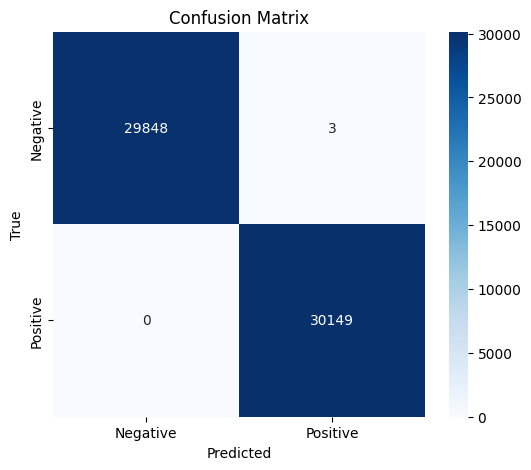

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29851
           1       1.00      1.00      1.00     30149

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



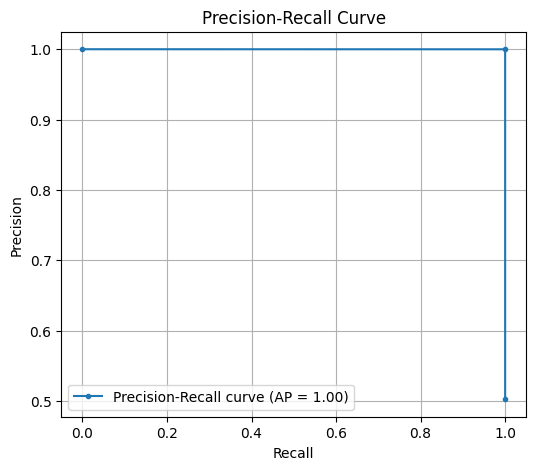

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def evaluate_classification_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train) # Fit the model

    y_proba = model.predict_proba(X_test)[:, 1] # Predict probabilities and classes
    y_pred = model.predict(X_test)

   # Predict probabilities and classes
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Precision-Recall AUC Score: {avg_precision:.4f}")

    # Print confusion matrix
    print("Confusion Matrix:")
    print(conf_matrix)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Precision-Recall Curve
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

# Define your models
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# Example usage for classification models
for name, model in classification_models.items():
    print(f"\n--- {name} ---")
    evaluate_classification_model(model, X_train, X_test, y_train, y_test)
